In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
SEED=11

In [3]:
def callback(**kwargs):
    stats.append(kwargs)
    return True

In [4]:
fitness = mlrose.FlipFlop()
input_sizes=[10,25,50]

# Randomized Hill Climbing

In [46]:
problem = mlrose.DiscreteOpt(25, fitness, maximize=True, max_val=2)
problem.find_neighbors()
len(problem.neighbors)


25

In [53]:
problem = mlrose.DiscreteOpt(25, fitness, maximize=True, max_val=2)
rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name="rhc",
                    output_directory=None,
                    seed=None,
                    iteration_list=[10000],
                    max_attempts=25,
                    restart_list=[500])   

df_run_stats, df_run_curves = rhc.run()

best_fitness = df_run_curves['Fitness'].max()
stopping_stats=df_run_stats[(df_run_stats['Iteration']==df_run_stats['max_iters'])&(df_run_stats['Fitness']==best_fitness)].drop(columns=['Iteration','Restarts'])
print(f"Found fitness score of {best_fitness} roughly every {df_run_stats.loc[0]['Restarts']/(stopping_stats.shape[0]):.3f} restarts")
stopping_stats

Found fitness score of 24.0 roughly every 500.000 restarts


,Fitness,FEvals,Time,State,max_iters,current_restart
127,24.0,5582,2.481926,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",10000,63


==========Input Size 10=================
[1 0 1 0 1 0 1 0 1 0] 9.0
Number of Iterations: 6076
Number of Fitness Evaluations: 6242
Average Fitness Evaluations per Iteration: 1.027
Wall Clock Time: 0.082142
==========Input Size 25=================
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1] 24.0
Number of Iterations: 8813
Number of Fitness Evaluations: 9306
Average Fitness Evaluations per Iteration: 1.056
Wall Clock Time: 0.080901
==========Input Size 50=================
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 1 0 1 0 1] 44.0
Number of Iterations: 11209
Number of Fitness Evaluations: 12138
Average Fitness Evaluations per Iteration: 1.083
Wall Clock Time: 0.153295


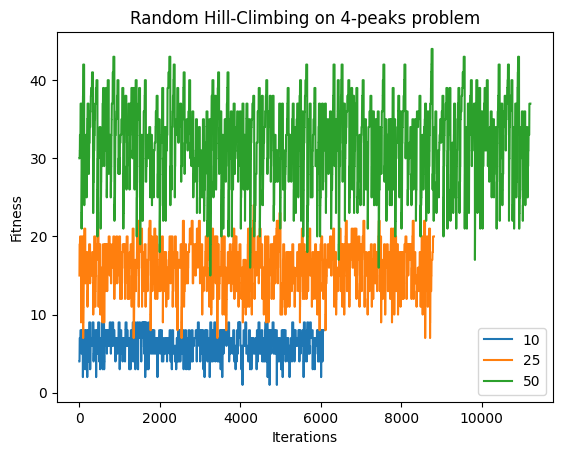

In [54]:
rhc_results=dict()
for input_size in input_sizes:
    problem = mlrose.DiscreteOpt(input_size, fitness, maximize=True, max_val=2)
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.random_hill_climb(problem,
                                                       random_state=SEED,
                                                                   max_attempts=25,
                                                                   restarts=170,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    rhc_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Random Hill-Climbing on 4-peaks problem")
plt.legend(loc='best')

# Simulated Annealing

In [89]:
problem = mlrose.DiscreteOpt(25, fitness, maximize=True, max_val=2)
temperature=[100,1000]*10
decay=[0.01,0.1,0.5,0.9,0.99,0.999]
temperature_list=[mlrose.GeomDecay(init_temp=t, decay=d) for t in temperature for d in decay]
sa = mlrose.SARunner(problem=problem,
              experiment_name='sa',
              seed=None,
              iteration_list=[100000],
              max_attempts=25,
              temperature_list=temperature_list)

# the two data frames will contain the results
df_run_stats, df_run_curves = sa.run()
df_run_stats['init_temp']=df_run_stats['Temperature'].apply(lambda x: x.init_temp)
df_run_stats['decay']=df_run_stats['Temperature'].apply(lambda x: x.decay)


best_fitness = df_run_stats['Fitness'].max()

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['init_temp','decay']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'],ascending=[False,True])

Fitness   FEvals      Time
init_temp decay                            
100       0.990     23.2   1224.8  0.104200
1000      0.500     23.0    403.1  0.066668
          0.990     23.0   1789.1  0.157769
          0.999     23.0  14743.0  4.978333
          0.100     22.9    229.7  0.058048
100       0.500     22.9    278.1  0.056353
          0.100     22.9    407.7  0.067691
          0.010     22.7    361.3  0.060831
1000      0.900     22.7    426.4  0.065299
100       0.900     22.7    455.2  0.065774
          0.999     22.6   9915.6  2.418677
1000      0.010     22.4    363.6  0.066648

==========Input Size 10=================
[1 0 1 0 1 0 1 0 1 0] 9.0
Number of Iterations: 7482
Number of Fitness Evaluations: 14168
Average Fitness Evaluations per Iteration: 1.894
Wall Clock Time: 0.126408
==========Input Size 25=================
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0] 24.0
Number of Iterations: 8274
Number of Fitness Evaluations: 15150
Average Fitness Evaluations per Iteration: 1.831
Wall Clock Time: 0.135365
==========Input Size 50=================
[1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1] 46.0
Number of Iterations: 7531
Number of Fitness Evaluations: 14181
Average Fitness Evaluations per Iteration: 1.883
Wall Clock Time: 0.170711


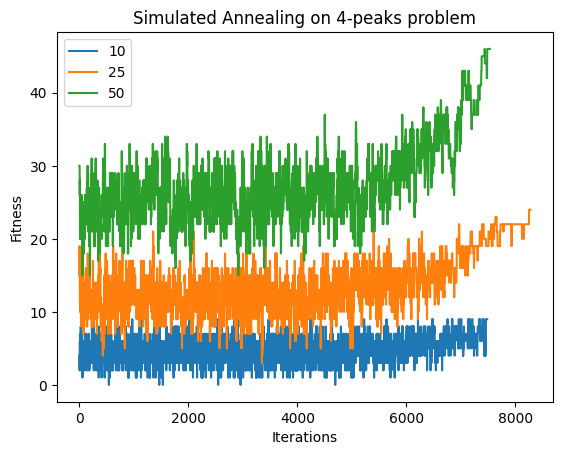

In [92]:
sa_results=dict()
for input_size in input_sizes:
    problem = mlrose.DiscreteOpt(input_size, fitness, maximize=True, max_val=2)
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.simulated_annealing(problem,
                                     schedule=mlrose.GeomDecay(init_temp=1000, decay=0.999, min_temp=0.001),
                                     max_attempts=25,
                                     random_state=SEED,
                                    state_fitness_callback=callback,
                                   callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    sa_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Simulated Annealing on 4-peaks problem")
plt.legend(loc='best')

# Genetic

In [81]:

problem = mlrose.DiscreteOpt(25, fitness, maximize=True, max_val=2)
problem = mlrose.DiscreteOpt(problem.length, fitness, maximize=True, max_val=2,
                             crossover=mlrose.algorithms.crossovers.OnePointCrossOver(problem),
                            mutator=mlrose.algorithms.mutators.ChangeOneMutator(problem))
ga=mlrose.GARunner(problem=problem,
                  experiment_name="ga",
                  output_directory=None,
                  seed=None,
                  iteration_list=[10000],
                  max_attempts=25,
                  population_sizes=[100,150,200]*5,
                  mutation_rates=np.arange(0.1,1,0.1))

df_run_stats, df_run_curves = ga.run()
best_fitness = df_run_stats['Fitness'].max()
#df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Mutation Rate','State']).agg({'Iteration':'min','Time':'min','FEvals':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Mutation Rate']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'],ascending=[False,True])

Fitness  FEvals      Time
Population Size Mutation Rate                           
200             0.3               24.0  7964.6  0.146207
                0.2               24.0  8406.2  0.152345
100             0.9               23.8  4165.8  0.078875
                0.4               23.8  4649.8  0.084378
150             0.5               23.8  5772.6  0.105660
                0.1               23.8  5983.8  0.105549
                0.8               23.8  6466.8  0.122132
200             0.1               23.8  7802.8  0.139383
                0.4               23.8  7803.0  0.145084
                0.5               23.8  7883.4  0.148608
                0.7               23.8  8004.4  0.153193
                0.8               23.8  8043.2  0.155826
                0.6               23.8  8043.4  0.152768
                0.9               23.8  8406.2  0.163731
100             0.2               23.6  4145.8  0.074790
                0.6               23.6  4467.4  0.082188
150             0.2               23.6  5711.2  0.101653
                0.3               23.6  5982.8  0.107392
                0.4               23.6  6044.4  0.109715
                0.9               23.6  6195.4  0.117833
                0.7               23.6  6618.0  0.123632
100             0.3               23.4  3984.2  0.071946
                0.7               23.4  4124.6  0.076727
                0.8               23.4  4327.4  0.081165
150             0.6               23.4  5982.8  0.110795
100             0.1               23.2  3922.2  0.076035
                0.5               22.8  3862.0  0.070582

==========Input Size 10=================
[0 1 0 1 0 1 0 1 0 1] 9.0
Number of Iterations: 30
Number of Fitness Evaluations: 6031
Average Fitness Evaluations per Iteration: 201.033
Wall Clock Time: 0.118704
==========Input Size 25=================
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0] 24.0
Number of Iterations: 34
Number of Fitness Evaluations: 6838
Average Fitness Evaluations per Iteration: 201.118
Wall Clock Time: 0.119685
==========Input Size 50=================
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0] 48.0
Number of Iterations: 51
Number of Fitness Evaluations: 10259
Average Fitness Evaluations per Iteration: 201.157
Wall Clock Time: 0.227861


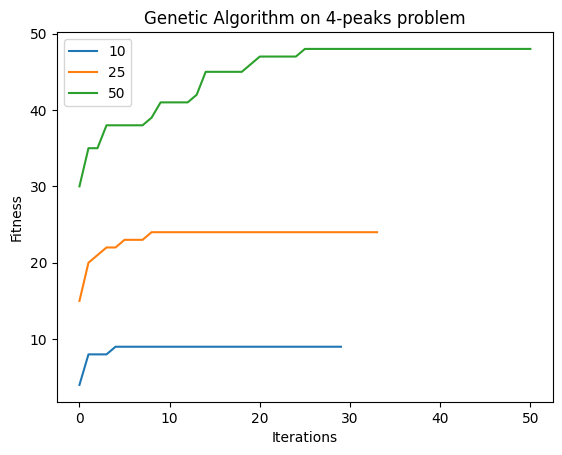

In [95]:
ga_results=dict()
for input_size in input_sizes:
    problem = mlrose.DiscreteOpt(input_size, fitness, maximize=True, max_val=2)
    problem = mlrose.DiscreteOpt(problem.length, fitness, maximize=True, max_val=2,
                             crossover=mlrose.algorithms.crossovers.OnePointCrossOver(problem),
                            mutator=mlrose.algorithms.mutators.ChangeOneMutator(problem))
    stats=[]
    
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.genetic_alg(problem,
                                                             pop_size=200,
                                                             mutation_prob=0.01,
                                                             max_attempts=25,
                                                       random_state=SEED,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    ga_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"Genetic Algorithm on 4-peaks problem")
plt.legend(loc='best')

# MIMIC

In [72]:
problem = mlrose.DiscreteOpt(25, fitness, maximize=True, max_val=2)
mmc = mlrose.MIMICRunner(problem=problem,
                          experiment_name="mimic", 
                          seed=None,
                          iteration_list=[1000], 
                          population_sizes=[50,100,150,200]*5,
                          keep_percent_list=np.arange(0.1,1,0.1), 
                          max_attempts=20, generate_curves=False, use_fast_mimic=True)

df_run_stats, df_run_curves = mmc.run()
best_fitness = df_run_stats['Fitness'].max()
df_run_stats[df_run_stats['Fitness']==best_fitness].groupby(['Fitness','Population Size','Keep Percent','State']).agg({'Iteration':'min','FEvals':'min','Time':'min'}).sort_values('FEvals')

agg_runs=df_run_stats[df_run_stats['Iteration']!=0].groupby(['Population Size','Keep Percent']).agg({"Fitness":"mean","FEvals":"mean","Time":"mean"})
agg_runs.sort_values(['Fitness','FEvals'],ascending=[False,True])

Fitness  FEvals      Time
Population Size Keep Percent                           
200             0.4              24.0  5349.6  0.120449
150             0.4              23.6  4080.6  0.102984
200             0.2              23.6  4946.8  0.110331
                0.5              23.6  5671.2  0.130439
                0.6              23.6  6878.2  0.161527
                0.3              23.4  5148.0  0.116554
150             0.6              23.2  4200.8  0.109799
                0.3              23.2  4291.4  0.111247
                0.5              23.2  4472.6  0.116932
                0.2              23.0  3686.6  0.095356
200             0.1              23.0  4745.0  0.106314
100             0.4              22.8  2669.6  0.085730
200             0.8              22.6  8002.8  0.191671
100             0.2              22.4  2587.8  0.077166
                0.7              22.4  3456.6  0.113842
150             0.1              22.4  3564.8  0.093095
                0.7              22.4  4986.6  0.131616
200             0.7              22.4  6113.4  0.142625
100             0.1              22.2  2425.4  0.077014
                0.6              22.2  3174.2  0.102448
150             0.8              22.2  5076.0  0.135254
50              0.3              22.0  1399.0  0.067789
100             0.3              22.0  2506.6  0.078888
                0.5              22.0  2729.0  0.087787
200             0.9              22.0  8083.2  0.197285
50              0.5              21.2  1287.4  0.061737
150             0.9              21.2  5287.0  0.144438
50              0.2              20.8  1215.0  0.055784
                0.4              20.8  1450.0  0.067949
                0.6              20.6  1440.4  0.070545
100             0.8              20.6  3031.8  0.099464
50              0.1              20.4  1234.8  0.064584
                0.9              20.4  1756.6  0.089625
100             0.9              20.4  3153.6  0.105627
50              0.7              20.2  1430.0  0.070734
                0.8              19.8  1582.6  0.079938

==========Input Size 10=================
[1 0 1 0 1 0 1 0 1 0] 9.0
Number of Iterations: 12
Number of Fitness Evaluations: 2412
Average Fitness Evaluations per Iteration: 201.000
Wall Clock Time: 0.181965
==========Input Size 25=================
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1] 24.0
Number of Iterations: 18
Number of Fitness Evaluations: 3621
Average Fitness Evaluations per Iteration: 201.167
Wall Clock Time: 1.319264
==========Input Size 50=================
[0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0] 46.0
Number of Iterations: 20
Number of Fitness Evaluations: 4024
Average Fitness Evaluations per Iteration: 201.200
Wall Clock Time: 5.577581


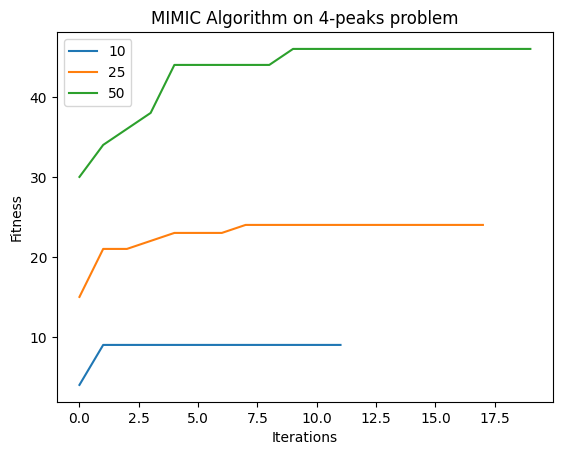

In [98]:
mimic_results=dict()
for input_size in input_sizes:
    problem = mlrose.DiscreteOpt(input_size, fitness, maximize=True, max_val=2)   
    problem.reset()
    stats=[]
    start_time=datetime.now()
    best_state,best_fitness,fitness_curve=mlrose.mimic(problem,
                                                       random_state=SEED,
                                                       pop_size=200,
                                                       keep_pct=0.4,
                                                       max_attempts=10,
                                                       state_fitness_callback=callback,
                                                       callback_user_info=[])
    wall_clock_time=(datetime.now()-start_time).total_seconds()
    print(f'==========Input Size {input_size}=================')
    print(best_state,best_fitness)
    print(f"Number of Iterations: {len(stats)}")
    print(f"Number of Fitness Evaluations: {stats[-1]['fitness_evaluations']}")
    print(f"Average Fitness Evaluations per Iteration: {stats[-1]['fitness_evaluations']*1.0/len(stats):.3f}")
    print(f"Wall Clock Time: {wall_clock_time}")
    plt.plot([i['fitness'] for i in stats],label=input_size)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    

    mimic_results[input_size]={
        'fitness_curve':[i['fitness'] for i in stats],
        'n_iterations': len(stats),
        'n_evals': stats[-1]['fitness_evaluations'],
        'best_fitness':best_fitness,
        'best_state':best_state,
        'wall_clock_time':wall_clock_time
    }

plt.title(f"MIMIC Algorithm on 4-peaks problem")
plt.legend(loc='best')

# Comparison

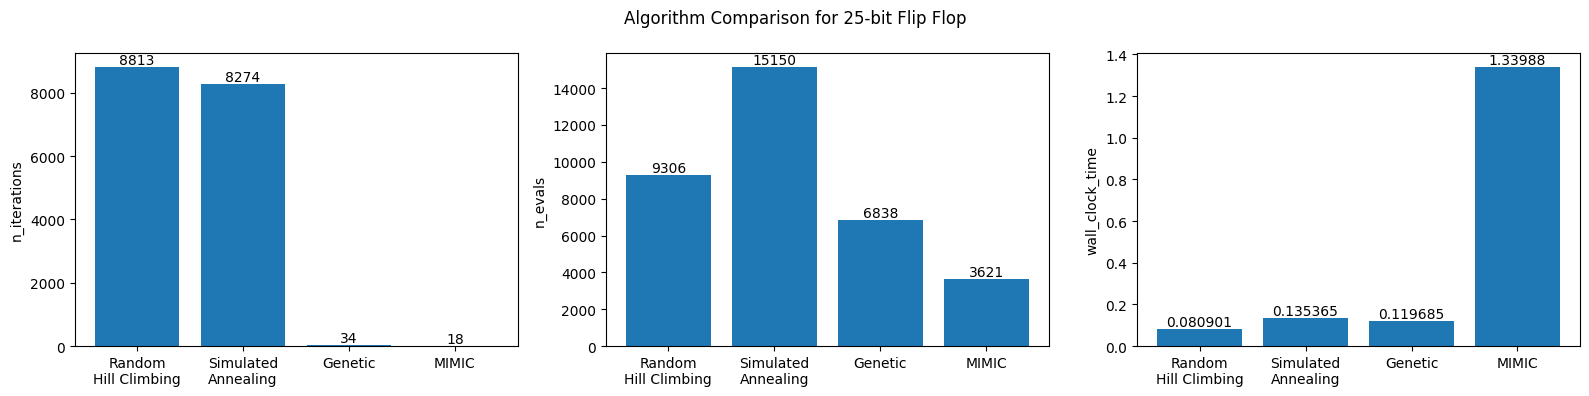

In [96]:
input_size=25
x=['Random\nHill Climbing','Simulated\nAnnealing','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
plots=['n_iterations','n_evals','wall_clock_time']
fig,axs=plt.subplots(1,3,figsize=(16,4))
best_fitness=max([alg[input_size]['best_fitness'] for alg in y])

for p,ax in zip(plots,axs):
    bars=[]
    bars.append(ax.bar(x,[alg[input_size][p] for alg in y]))
    for bar in bars:
        for b,alg in zip(bar,y):
            if alg[input_size]['best_fitness']!=best_fitness:
                b.set(hatch='/')
        ax.bar_label(bar)
                
    ax.set_ylabel(p)
plt.suptitle("Algorithm Comparison for 25-bit Flip Flop")
plt.tight_layout()

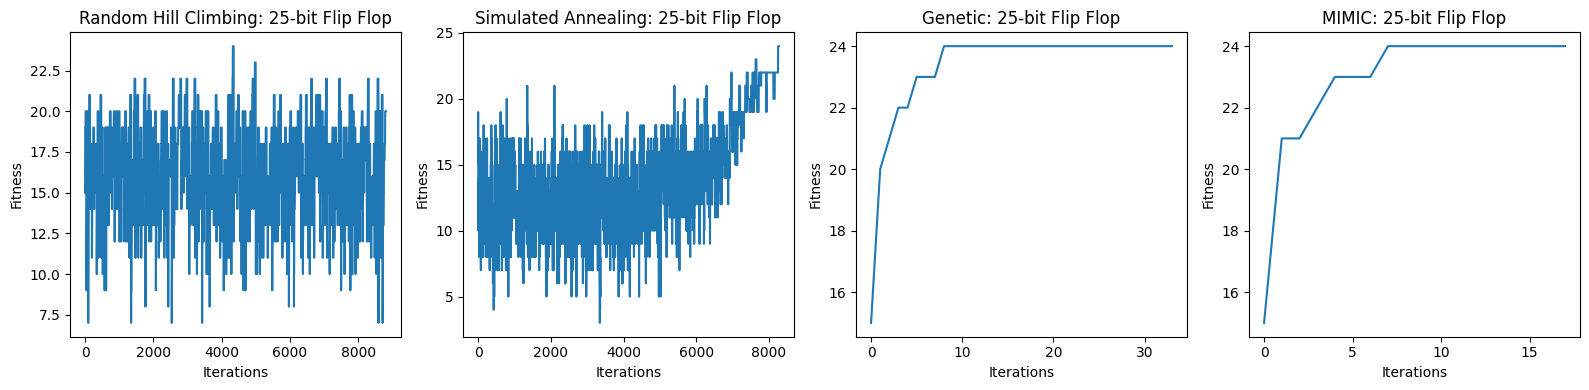

In [99]:
i=25
fig,axs=plt.subplots(1,4,figsize=(16,4))
x=['Random Hill Climbing','Simulated Annealing','Genetic','MIMIC']
y=[rhc_results,sa_results,ga_results,mimic_results]
for alg,results,ax in zip(x,y,axs):
    ax.set_title(f"{alg}: {i}-bit Flip Flop")
    ax.plot(results[i]['fitness_curve'])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
plt.tight_layout()